# K-Mean 觀察 : 使用輪廓分析

K-means 怎麼選 K ? https://blog.v123582.tw/2019/01/20/K-means-%E6%80%8E%E9%BA%BC%E9%81%B8-K/

載入鳶尾花(iris)資料集, 以輪廓分析 (Silhouette analysis) 來觀察 K-mean 分群時不同 K 值的比較
因為非監督模型的效果, 較難以簡單的範例看出來
所以後續非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,
同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

In [1]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# 載入 iris 資料集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 設定需要計算的 K 值集合
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

For n_clusters = 2 The average silhouette_score is : 0.681046169211746
[0.85222463 0.82691627 0.83542604 0.81924938 0.84873095 0.76720908
 0.82934134 0.85502806 0.77726197 0.83455018 0.81046131 0.84222024
 0.82253478 0.76729412 0.72053353 0.67066105 0.78513177 0.85108451
 0.73302036 0.82472323 0.80110411 0.8306016  0.80054559 0.81307005
 0.79839475 0.81633577 0.84102272 0.84419398 0.84537872 0.8298386
 0.82859427 0.81127842 0.77396266 0.73789552 0.83787156 0.83635801
 0.80281102 0.8426328  0.78831503 0.85196512 0.8491337  0.68955963
 0.80129264 0.81473797 0.77157995 0.82303672 0.81973645 0.82835951
 0.82297915 0.85340824 0.65738932 0.67275607 0.69882445 0.45134843
 0.70213688 0.62644404 0.69541802 0.07236209 0.67966627 0.37112501
 0.07037111 0.60032206 0.4630224  0.70314805 0.29941062 0.64358008
 0.62224448 0.49877067 0.64331724 0.41482364 0.69590266 0.5447286
 0.71784072 0.67922809 0.6328376  0.65468579 0.69731155 0.73348993
 0.6781123  0.21590762 0.35132545 0.28480542 0.46693142 0.72

For n_clusters = 8 The average silhouette_score is : 0.34873453772193774
[ 0.32270479  0.50004048  0.52801522  0.58448659  0.30139998  0.52274284
  0.38383296  0.04299262  0.56009762  0.45991062  0.54478359  0.21284904
  0.5520953   0.49236997  0.43578672  0.42759938  0.50971865  0.33990509
  0.48611709  0.49226038  0.36864612  0.46641477  0.16716442  0.1076324
  0.0963902   0.36617735  0.10921997  0.41867179  0.29018309  0.49588725
  0.50014577  0.39680449  0.45968457  0.47858867  0.46643705  0.2513294
  0.42071302  0.12419848  0.56438829  0.2082064   0.16891907  0.40600853
  0.52859763  0.21089014  0.38348557  0.53796307  0.47411052  0.56345105
  0.54310906  0.11791147  0.44121956  0.48994644  0.36856973  0.12718729
  0.40551487  0.31169394  0.3175937   0.57221385  0.51084179  0.075944
  0.49952483  0.16769147  0.17942034  0.19015665  0.04759981  0.53800038
  0.22736906  0.41488045 -0.03272825  0.09746887  0.15511523  0.20312286
  0.12186677  0.21083814  0.38781202  0.54423275  0.378

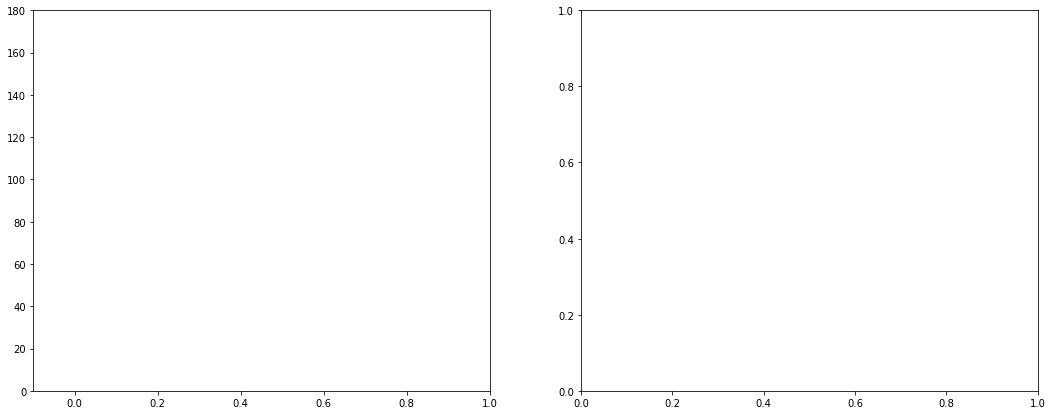

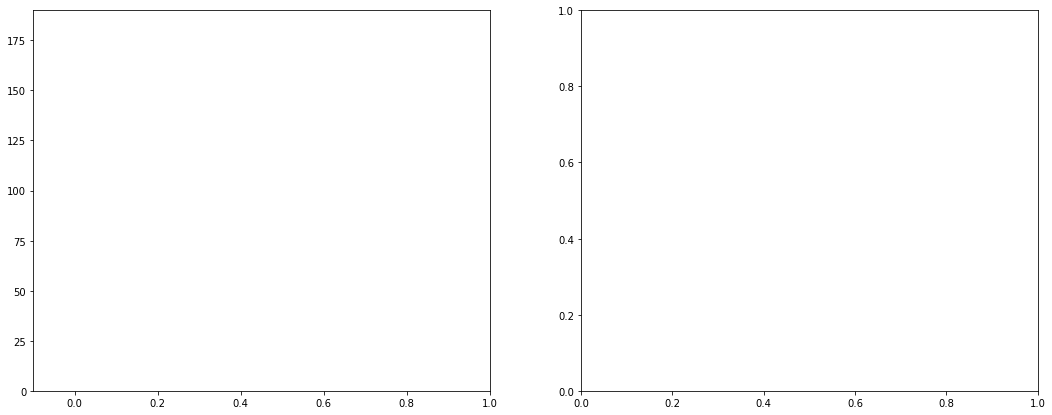

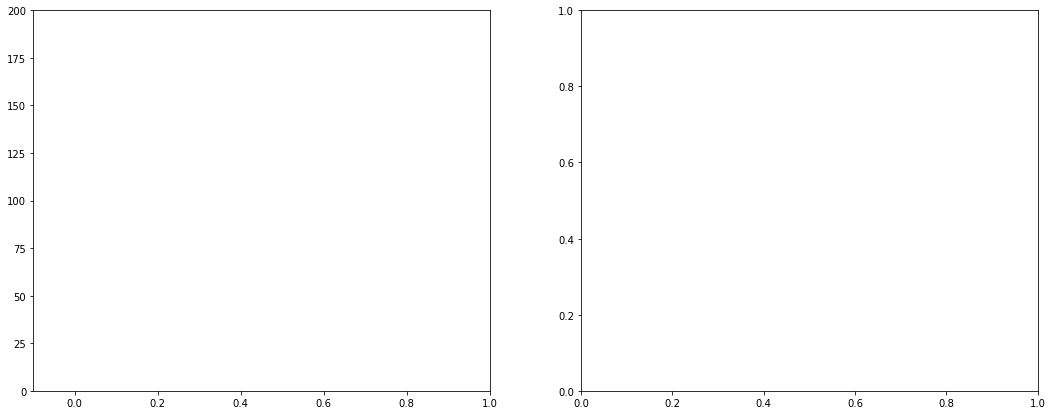

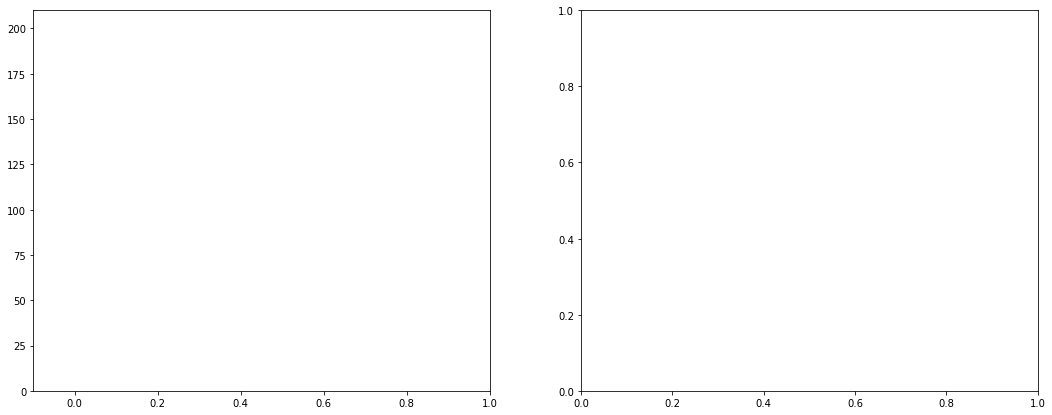

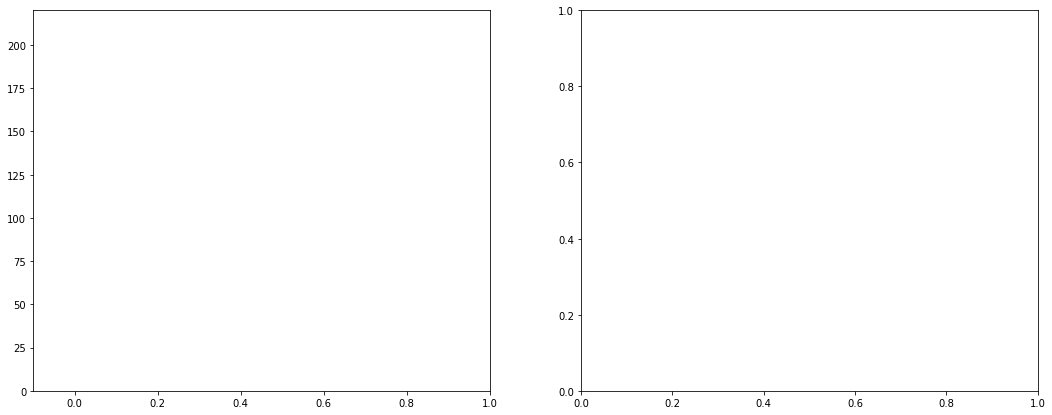

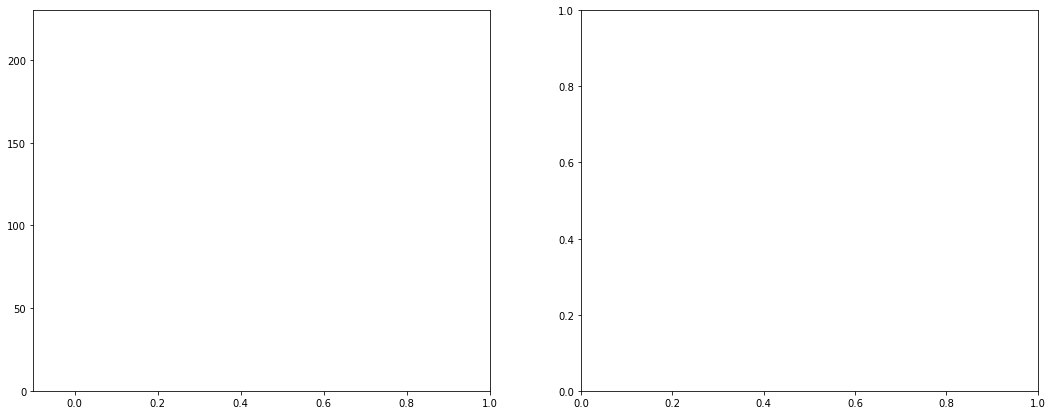

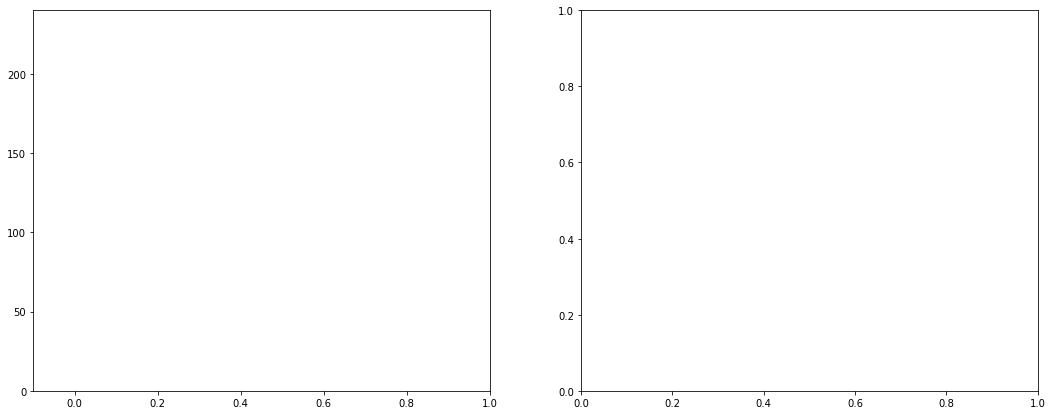

In [4]:
# 計算並繪製輪廓分析的結果
# 因下列為迴圈寫法, 無法再分拆為更小執行區塊, 請見諒
for n_clusters in range_n_clusters:
    # 設定小圖排版為 1 row 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 左圖為輪廓分析(Silhouette analysis), 雖然輪廓係數範圍在(-1,1)區間, 但範例中都為正值, 因此我們把顯示範圍定在(-0.1,1)之間
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 這部分是用來在不同輪廓圖間塞入空白, 讓圖形看起來更清楚
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # 宣告 KMean 分群器, 對 X 訓練並預測
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # 計算所有點的 silhouette_score 平均
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # 計算所有樣本的 The silhouette_score
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # 收集集群 i 樣本的輪廓分數，並對它們進行排序
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # 在每個集群中間標上 i 的數值
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 計算下一個 y_lower 的位置
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # 將 silhouette_score 平均所在位置, 畫上一條垂直線
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # 清空 y 軸的格線
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 右圖我們用來畫上每個樣本點的分群狀態, 從另一個角度觀察分群是否洽當
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # 在右圖每一群的中心處, 畫上一個圓圈並標註對應的編號
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()